In [1]:
import pandas as pd
import numpy as np

#visualization
%matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

from wordcloud import WordCloud
import seaborn as sns
import pandas_profiling as pp
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


Using matplotlib backend: Qt5Agg


In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [3]:
xls = pd.ExcelFile("C:/Users/Asus/Desktop/Analyst/Customers Insight Analyst/abab.xlsx")

koins = xls.parse(1) #2 is the sheet number

In [4]:
koins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_name        2511 non-null   object        
 1   loan_duration    2511 non-null   int64         
 2   loan_grade       2511 non-null   object        
 3   lender_interest  2511 non-null   float64       
 4   totalpurc        2511 non-null   object        
 5   total_purchase   2511 non-null   float64       
 6   order_status     2511 non-null   object        
 7   order_type       2511 non-null   object        
 8   order_date       2511 non-null   datetime64[ns]
 9   product          2511 non-null   object        
 10  sub_product      2511 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 215.9+ KB


In [5]:
koins.head()

,user_name,loan_duration,loan_grade,lender_interest,totalpurc,total_purchase,order_status,order_type,order_date,product,sub_product
0,User 1580,2,A5,14.4,>=100000-4999999,100000.0,success,auto,2021-05-31,KoinP2P,koin_invoice
1,User 1581,3,B2,14.0,<100000,0.0,failed,auto,2021-05-31,KoinP2P,koin_invoice
2,User 1582,3,B2,14.0,<100000,0.0,failed,auto,2021-05-31,KoinP2P,koin_invoice
3,User 1583,2,A5,14.4,>=100000-4999999,500000.0,success,manual,2021-05-31,KoinP2P,koin_invoice
4,User 1584,1,B2,16.6,>=100000-4999999,500000.0,success,auto,2021-05-31,KoinP2P,koin_invoice


In [6]:
#Looking unique values
print(koins.nunique())

user_name          1556
loan_duration        11
loan_grade           15
lender_interest      71
totalpurc             4
total_purchase       96
order_status          4
order_type            2
order_date           31
product               2
sub_product           4
dtype: int64


In [7]:
#checking missing values
koins.isnull().sum()

user_name          0
loan_duration      0
loan_grade         0
lender_interest    0
totalpurc          0
total_purchase     0
order_status       0
order_type         0
order_date         0
product            0
sub_product        0
dtype: int64

In [8]:
def missingdata(koins):
    total = koins.isnull().sum().sort_values(ascending = False)
    percent = (koins.isnull().sum()/koins.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Persentase'])
    return ms

In [9]:
missingdata(koins)

,Total,Persentase
user_name,0,0.0
loan_duration,0,0.0
loan_grade,0,0.0
lender_interest,0,0.0
totalpurc,0,0.0
total_purchase,0,0.0
order_status,0,0.0
order_type,0,0.0
order_date,0,0.0
product,0,0.0


In [10]:
koin=koins.drop_duplicates()
koin

,user_name,loan_duration,loan_grade,lender_interest,totalpurc,total_purchase,order_status,order_type,order_date,product,sub_product
0,User 1580,2,A5,14.4,>=100000-4999999,100000.0,success,auto,2021-05-31,KoinP2P,koin_invoice
1,User 1581,3,B2,14.0,<100000,0.0,failed,auto,2021-05-31,KoinP2P,koin_invoice
2,User 1582,3,B2,14.0,<100000,0.0,failed,auto,2021-05-31,KoinP2P,koin_invoice
3,User 1583,2,A5,14.4,>=100000-4999999,500000.0,success,manual,2021-05-31,KoinP2P,koin_invoice
4,User 1584,1,B2,16.6,>=100000-4999999,500000.0,success,auto,2021-05-31,KoinP2P,koin_invoice
...,...,...,...,...,...,...,...,...,...,...,...
2506,User 32,1,A1,14.0,>=100000-4999999,100000.0,success,manual,2021-05-01,KoinP2P,koin_invoice
2507,User 33,1,A1,14.0,>=100000-4999999,100000.0,success,manual,2021-05-01,KoinP2P,koin_invoice
2508,User 34,1,A1,14.0,>=100000-4999999,100000.0,success,manual,2021-05-01,KoinP2P,koin_invoice
2509,User 35,1,A1,14.0,>=100000-4999999,100000.0,success,manual,2021-05-01,KoinP2P,koin_invoice


In [11]:
##Exploratory Data Analysis of Numerical Data    
#Boxplot: Lender Interest
Category1 = koin[koin.sub_product=="koin_invoice"].lender_interest
Category2 = koin[koin.sub_product=="koin_bisnis"].lender_interest
Category3 = koin[koin.sub_product=="koin_pintar"].lender_interest
Category4 = koin[koin.sub_product=="koin_robo"].lender_interest

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=Category1, name='koin_invoice'))
fig.add_trace(go.Box(x=Category2, name='koin_bisnis'))
fig.add_trace(go.Box(x=Category3, name='koin_pintar'))
fig.add_trace(go.Box(x=Category4, name='koin_robo'))

fig.show()

In [12]:
##Exploratory Data Analysis of Categorical Data 
#Subproduct Distribution
labels = koin.sub_product.unique()
values=[]
for each in labels:
    values.append(len(koin[koin.sub_product==each]))

#donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.show()

subprod = koin["sub_product"]
print(subprod.value_counts())

koin_invoice    1821
koin_bisnis      315
koin_robo        274
koin_pintar       37
Name: sub_product, dtype: int64


In [13]:
#Order status Distribution
status = koin["order_status"]
print(status.value_counts())

#visualization
labels = ['success', 'failed', 'internal_cancel', 'waiting_for_transfer']
size = koin['order_status'].value_counts()
colors = ['lightgreen', 'orange','yellow','lightblue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Order Status', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

%matplotlib inline

success                 1944
failed                   337
internal_cancel          145
waiting_for_transfer      21
Name: order_status, dtype: int64


<ipython-input-13-8e714421ead1>:16: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



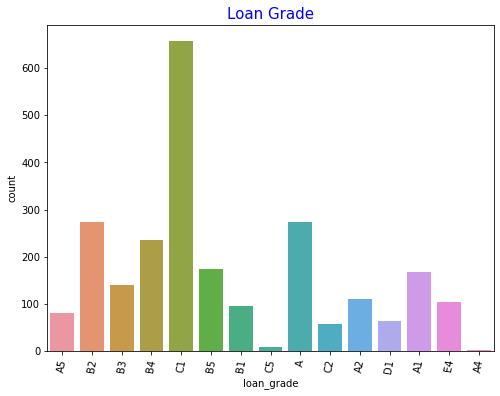

C1    658
A     274
B2    273
B4    235
B5    175
A1    167
B3    140
A2    110
E4    105
B1     96
A5     82
D1     64
C2     58
C5      8
A4      2
Name: loan_grade, dtype: int64


In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=koin, x='loan_grade')
plt.xticks(rotation=80)
plt.title('Loan Grade',color = 'blue',fontsize=15)
plt.show()

%matplotlib inline

loangrade = koin["loan_grade"]
print(loangrade.value_counts())

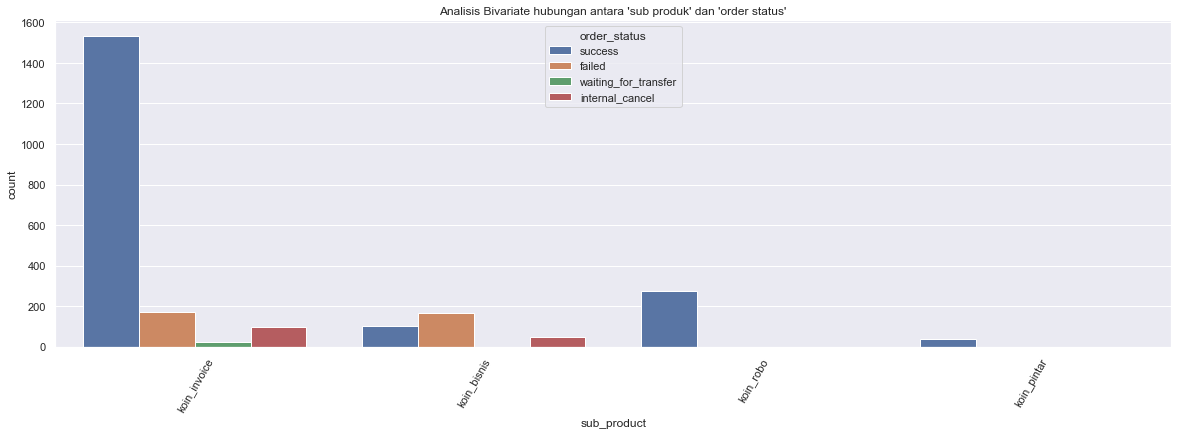

In [15]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(20, 6)})
grade = sns.countplot(x="sub_product", data = koin, hue = "order_status", order = koin["sub_product"].value_counts().index)
grade.tick_params(axis='x', rotation=60)
plt.title("Analisis Bivariate hubungan antara 'sub produk' dan 'order status'")
plt.show()

%matplotlib inline

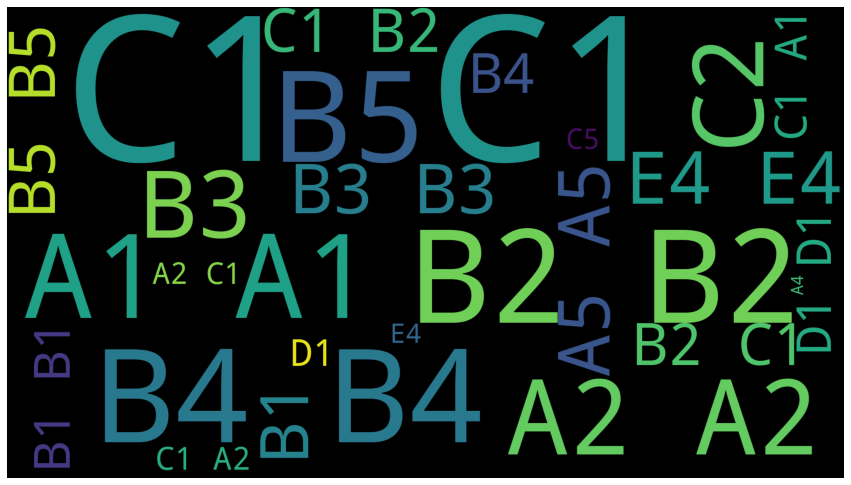

In [16]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(koin.loan_grade))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

%matplotlib inline

In [17]:
df2 = koin.drop(['product','order_date','total_purchase'], axis=1)

df2.head()

,user_name,loan_duration,loan_grade,lender_interest,totalpurc,order_status,order_type,sub_product
0,User 1580,2,A5,14.4,>=100000-4999999,success,auto,koin_invoice
1,User 1581,3,B2,14.0,<100000,failed,auto,koin_invoice
2,User 1582,3,B2,14.0,<100000,failed,auto,koin_invoice
3,User 1583,2,A5,14.4,>=100000-4999999,success,manual,koin_invoice
4,User 1584,1,B2,16.6,>=100000-4999999,success,auto,koin_invoice


In [18]:
koin['order_type'] = koin['order_type'].replace({'manual': 0, 'auto': 1})
koin['order_type'].value_counts()

<ipython-input-18-869573d0c220>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    2339
1     108
Name: order_type, dtype: int64

In [19]:
koin['sub_product'] = koin['sub_product'].replace({'koin_invoice': 0, 'koin_bisnis': 1,'koin_pintar':2,'koin_robo':3})
koin['sub_product'].value_counts()

<ipython-input-19-9d040ca14e79>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    1821
1     315
3     274
2      37
Name: sub_product, dtype: int64

In [20]:
koin['order_status'] = koin['order_status'].replace({'success': 0, 'failed': 1,'internal_cancel':2,'waiting_for_transfer':3})
koin['order_status'].value_counts()

<ipython-input-20-0ea6ce0549a2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    1944
1     337
2     145
3      21
Name: order_status, dtype: int64

In [21]:
koin['totalpurc'] = koin['totalpurc'].replace({'<100000': 0, '>=100000-4999999': 1,'>=5000000-49999999':2,'>=50000000':3})
koin['totalpurc'].value_counts()

<ipython-input-21-4e9a6cf14b23>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1    1749
0     502
2     146
3      50
Name: totalpurc, dtype: int64

In [22]:
koin['loan_grade'] = koin['loan_grade'].replace({'A': 0, 'A1': 1,'A2':2,'A4':4,'A5':5,'B1':6,'B2':7,'B3':8,'B4':9,'B5':10,'C1':11,'C2':12,'C5':13,'D1':14,'E4':15})
koin['loan_grade'].value_counts()

<ipython-input-22-0ce5833064cc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



11    658
0     274
7     273
9     235
10    175
1     167
8     140
2     110
15    105
6      96
5      82
14     64
12     58
13      8
4       2
Name: loan_grade, dtype: int64

In [23]:
#Now one hot encoding
koin_new=pd.get_dummies(koin, columns=['order_status'],drop_first=False)
print(koin_new.shape)

(2447, 14)


In [24]:
koin_new.columns

Index(['user_name', 'loan_duration', 'loan_grade', 'lender_interest',
       'totalpurc', 'total_purchase', 'order_type', 'order_date', 'product',
       'sub_product', 'order_status_0', 'order_status_1', 'order_status_2',
       'order_status_3'],
      dtype='object')

In [25]:
cor=koin_new.corr()
cor

,loan_duration,loan_grade,lender_interest,totalpurc,total_purchase,order_type,sub_product,order_status_0,order_status_1,order_status_2,order_status_3
loan_duration,1.000000,0.328564,0.351152,-0.241729,-0.046374,0.022451,0.420481,-0.302720,0.316181,0.072908,-0.041625
loan_grade,0.328564,1.000000,0.616004,-0.394251,-0.143416,0.030590,-0.426617,-0.389799,0.339422,0.192547,-0.053196
lender_interest,0.351152,0.616004,1.000000,-0.307686,-0.087174,0.033346,-0.240272,-0.338019,0.347730,0.077445,-0.016459
totalpurc,-0.241729,-0.394251,-0.307686,1.000000,0.540952,-0.009277,0.140757,0.784453,-0.617689,-0.384919,-0.143801
total_purchase,-0.046374,-0.143416,-0.087174,0.540952,1.000000,-0.012528,0.156582,0.097846,-0.076880,-0.048269,-0.017898
order_type,0.022451,0.030590,0.033346,-0.009277,-0.012528,1.000000,-0.051892,-0.008861,-0.074328,0.131463,-0.019992
sub_product,0.420481,-0.426617,-0.240272,0.140757,0.156582,-0.051892,1.000000,0.035166,0.001485,-0.043921,-0.047189
order_status_0,-0.302720,-0.389799,-0.338019,0.784453,0.097846,-0.008861,0.035166,1.000000,-0.785666,-0.493396,-0.182906
order_status_1,0.316181,0.339422,0.347730,-0.617689,-0.076880,-0.074328,0.001485,-0.785666,1.000000,-0.100301,-0.037182
order_status_2,0.072908,0.192547,0.077445,-0.384919,-0.048269,0.131463,-0.043921,-0.493396,-0.100301,1.000000,-0.023350


In [26]:
df = koin_new[['loan_duration', 'lender_interest', 'totalpurc',
        'order_status_0', 'order_status_1', 'order_status_2', 'order_status_3']]
df.head(10)

,loan_duration,lender_interest,totalpurc,order_status_0,order_status_1,order_status_2,order_status_3
0,2,14.4,1,1,0,0,0
1,3,14.0,0,0,1,0,0
2,3,14.0,0,0,1,0,0
3,2,14.4,1,1,0,0,0
4,1,16.6,1,1,0,0,0
5,2,14.4,1,1,0,0,0
6,2,14.4,0,0,1,0,0
7,2,14.4,1,1,0,0,0
8,3,17.2,1,1,0,0,0
9,2,14.4,3,1,0,0,0


In [27]:
df.corr()

,loan_duration,lender_interest,totalpurc,order_status_0,order_status_1,order_status_2,order_status_3
loan_duration,1.000000,0.351152,-0.241729,-0.302720,0.316181,0.072908,-0.041625
lender_interest,0.351152,1.000000,-0.307686,-0.338019,0.347730,0.077445,-0.016459
totalpurc,-0.241729,-0.307686,1.000000,0.784453,-0.617689,-0.384919,-0.143801
order_status_0,-0.302720,-0.338019,0.784453,1.000000,-0.785666,-0.493396,-0.182906
order_status_1,0.316181,0.347730,-0.617689,-0.785666,1.000000,-0.100301,-0.037182
order_status_2,0.072908,0.077445,-0.384919,-0.493396,-0.100301,1.000000,-0.023350
order_status_3,-0.041625,-0.016459,-0.143801,-0.182906,-0.037182,-0.023350,1.000000


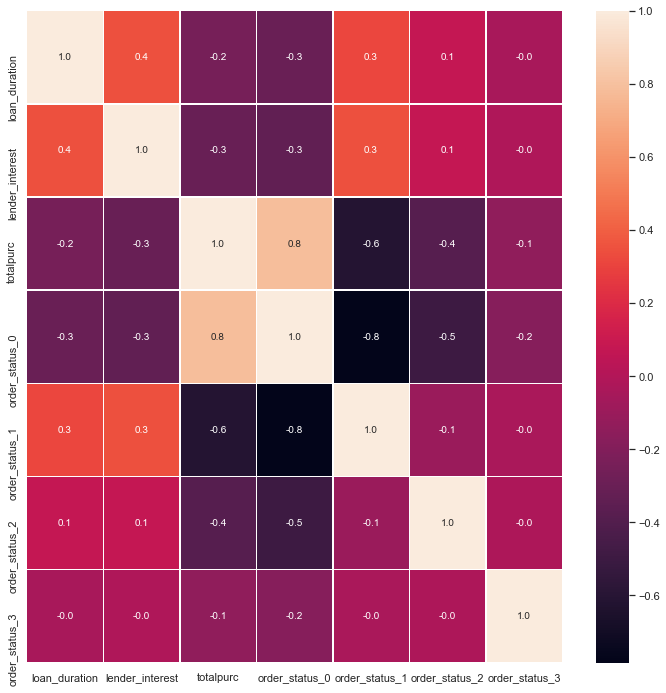

In [28]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('totalpurc',axis=1))
scaled_features = scaler.transform(df.drop('totalpurc',axis=1))

In [30]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head(30).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,loan_duration,lender_interest,totalpurc,order_status_0,order_status_1,order_status_2
0,0.043478,0.150603,1.000000,0.000000,0.000000,0.000000
1,0.086957,0.144811,0.000000,1.000000,0.000000,0.000000
2,0.086957,0.144811,0.000000,1.000000,0.000000,0.000000
3,0.043478,0.150603,1.000000,0.000000,0.000000,0.000000
4,0.000000,0.182462,1.000000,0.000000,0.000000,0.000000
5,0.043478,0.150603,1.000000,0.000000,0.000000,0.000000
6,0.043478,0.150603,0.000000,1.000000,0.000000,0.000000
7,0.043478,0.150603,1.000000,0.000000,0.000000,0.000000
8,0.086957,0.191150,1.000000,0.000000,0.000000,0.000000
9,0.043478,0.150603,1.000000,0.000000,0.000000,0.000000


In [31]:
X = scaled_features
y = df['totalpurc']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score

In [34]:
knn = KNeighborsClassifier(n_neighbors=4)
knn = knn.fit(X_train, y_train)
preds= knn.predict(X_test)
acc = accuracy_score(y_test,preds)

print("accuracy score for classification: ",acc)


accuracy score for classification:  0.9292517006802721
